In [12]:
def convert_range(x,minimum, maximum,a,b):
    return (x - minimum)/(maximum - minimum) * (b - a) + a\

import numpy as np
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [9]:
import numpy as np

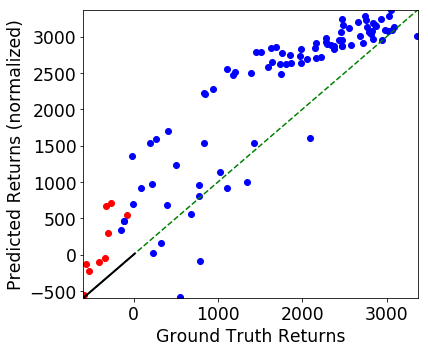

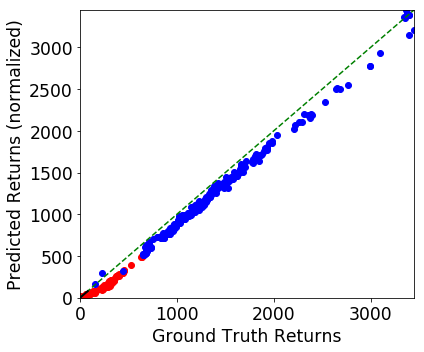

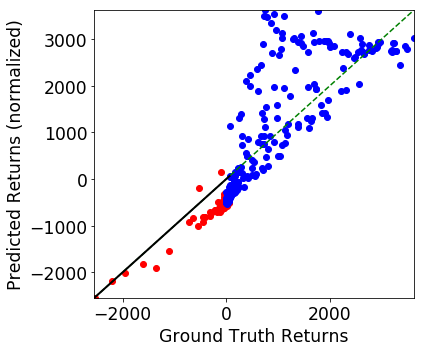

In [19]:
def draw(gt_returns, pred_returns, seen):
    seen_ptr = np.max(np.where(seen))
    
    gt_max,gt_min = max(gt_returns),min(gt_returns)
    pred_max,pred_min = max(pred_returns),min(pred_returns)
    max_observed = max(pred_returns[:seen_ptr])
    
    # Draw P
    plt.plot(gt_returns[:seen_ptr], [convert_range(p,pred_max,pred_min,gt_max,gt_min) for p in pred_returns[:seen_ptr]], 'o', color='red')
    plt.plot(gt_returns[seen_ptr:], [convert_range(p,pred_max,pred_min,gt_max,gt_min) for p in pred_returns[seen_ptr:]], 'o', color='blue')

    plt.plot([gt_min-5,gt_max+5],[gt_min-5,gt_max+5],'g--')
    plt.plot([gt_min-5,max_observed],[gt_min-5,max_observed],'k-', linewidth=2)
    plt.axis([gt_min-5,gt_max+5,gt_min-5,gt_max+5])
    plt.xlabel("Ground Truth Returns")
    plt.ylabel("Predicted Returns (normalized)")
    plt.tight_layout()
    
    plt.show()
    
def draww(filename):
    data = np.load(filename)
    acc_r_pts = data['acc_r_pts']

    x,y,seen = [np.array(e) for e in zip(*acc_r_pts)]
    draw(x,y,seen)
    
draww('/home/wonjoon/workspace/LfL/log_report/cheetah/45/gt_traj/reward_analysis.npz')
draww('/home/wonjoon/workspace/LfL/log_report/hopper/40/gt_traj_no_steps/reward_analysis.npz')
draww('/home/wonjoon/workspace/LfL/log_report/new_ant/60/gt_traj_no_steps_50/reward_analysis.npz')